In [1]:
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
spamreader = pd.read_csv("fitting.txt", sep=" ")
x_obs=np.array(spamreader["#"])
y_obs=np.array(spamreader["x"])
sigma_y_obs = np.array(spamreader["y"])

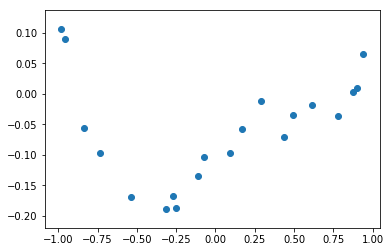

In [3]:
plt.scatter(x_obs,y_obs)

In [25]:
def prior(p):
    param = np.random.random(size=p)*2-1
    return param

def modelo(x,param):
    p = len(param)
    y=x.copy()
    y=0
    y= y+ param[0]
    for i in range(1,p):
        y+=param[i]*(x**i)
    return y

def loglikelihood(x_obs, y_obs, sigma_y_obs, param):
    #Usando Gauss
    d = y_obs -  modelo(x_obs, param)
    d = -0.5*d**2/sigma_y_obs**2
    d = d-np.log(np.sqrt(2*np.pi*sigma_y_obs))
    d = np.sum(d)
    return d

In [26]:
def integral(x_obs, y_obs, sigma_y_obs, N=1000, p=3):
    likes = []
    for i in range(N):
        betas = prior(p)
        b = loglikelihood(x_obs, y_obs, sigma_y_obs, betas)
        likes.append(np.exp(b))
    prom = np.mean(likes)
    
    return prom
    

In [34]:
integral(x_obs, y_obs, sigma_y_obs,N=10000,p=2)

1.3099206600371734e-27

In [35]:
integrales =[]
losi = []
for i in range(1,19):
    losi.append(i)
    integrales.append(integral(x_obs, y_obs, sigma_y_obs,N=10000,p=i))

[9.076153958525562e-38, 2.3323855586580274e-28, 2.03765885305182e-22, 1.598033311383173e-07, 8.453672749500999e-32, 5.490281702043344e-28, 2.506718913013195e-70, 9.242294810331409e-59, 2.779332212856816e-24, 2.06072593445759e-90, 1.613751886331166e-60, 1.128291335977553e-21, 1.60199836265604e-55, 1.5466061940482367e-58, 4.79017173957625e-41, 1.0890349664587445e-84, 4.120992733962213e-85, 7.5175154863089575e-53]


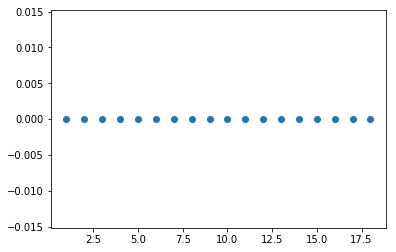

In [38]:
plt.scatter(losi,integrales)
print(integrales)

